Text(0, 0.5, 'State')

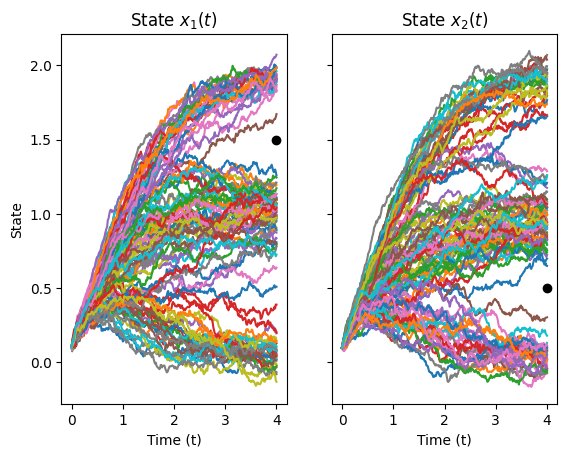

In [7]:
from src.sdes import sde_cell_model, time
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt

from tueplots import bundles, axes, cycler, figsizes
from tueplots.constants.color import palettes

# bundle = bundles.neurips2023()
# plt.rcParams.update(bundle)
# axes.lines()
# plt.rcParams.update(cycler.cycler(color=palettes.paultol_muted))


x0 = [.1, .1]
y= [1.5, 0.5]
T = 4.
N = 300
ts = time.grid(0, T, N)


keys = jax.random.split(jax.random.PRNGKey(0), 100)
data_fn = sde_cell_model.data_forward(x0, T, N)
_, forward_trajs, correction = data_fn(keys)

# plt.rcParams.update(figsizes.neurips2023(nrows=1, ncols=2))
fig, axs = plt.subplots(1, 2, sharey=True)

for traj in forward_trajs:
    axs[0].plot(ts, traj[..., 0])
    axs[1].plot(ts, traj[..., 1])
axs[0].scatter(ts[-1], y[0], color='black')
axs[1].scatter(ts[-1], y[1], color='black')
    
axs[0].set_title(r'State $x_1(t)$')
axs[1].set_title(r'State $x_2(t)$')
axs[0].set_xlabel('Time (t)')
axs[1].set_xlabel('Time (t)')
axs[0].set_ylabel(r'State')
# axes[1].set_ylabel(r'State ($x_2(t)$)')

# plt.savefig('cell_model_forward_trajs.pdf')



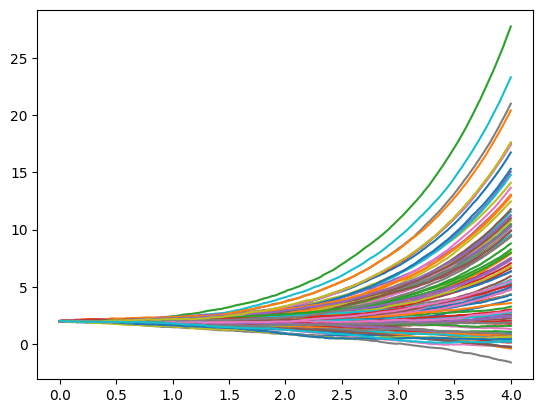

<function matplotlib.pyplot.show(close=None, block=None)>

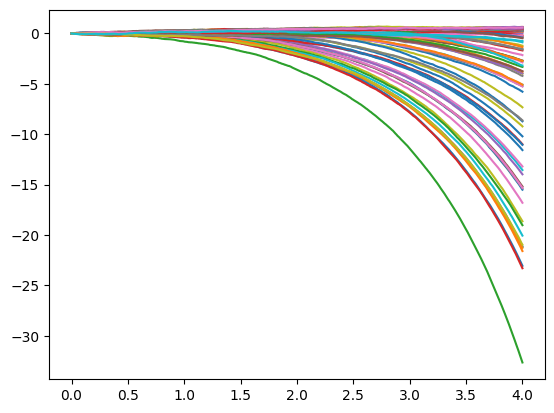

In [2]:
from src.data_generate_sde import sde_cell_model, time
import matplotlib.pyplot as plt
import jax

# y = [1., 1.]
# T = 2.
# N = 100
# ts = time.grid(0, T, N)


keys = jax.random.split(jax.random.PRNGKey(0), 100)

# inverse_covariance = jnp.asarray([[1e-2, 0.], [0., 1e-2]])
# weight_fn = sde_cell_model.weight_function_gaussian(x0, inverse_covariance)

data_fn = sde_cell_model.data_reverse(y, T, N)
_, rev_trajs, correction = data_fn(keys)

for traj in rev_trajs:
        plt.plot(ts, traj[..., 0])
plt.show()
    
for traj in rev_trajs:
    plt.plot(ts, traj[..., 1])
plt.show

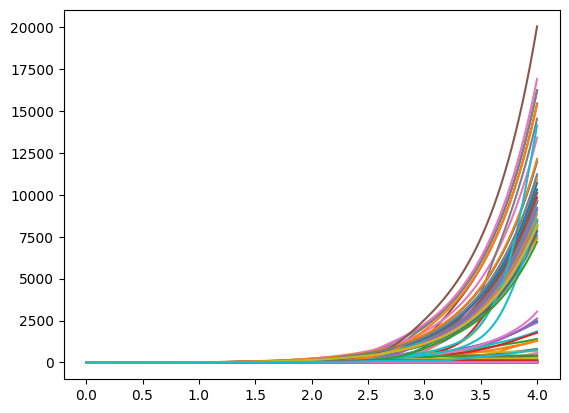

In [3]:
for c in correction:
    plt.plot(ts, c)
plt.show()


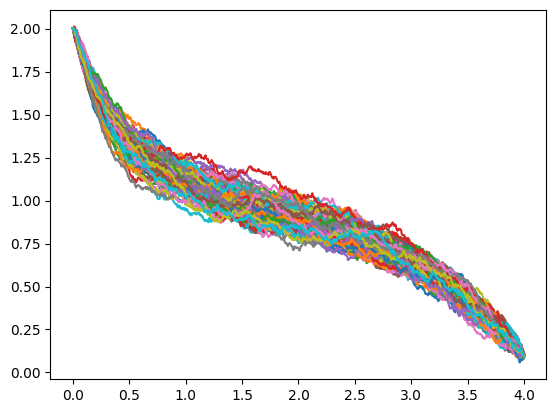

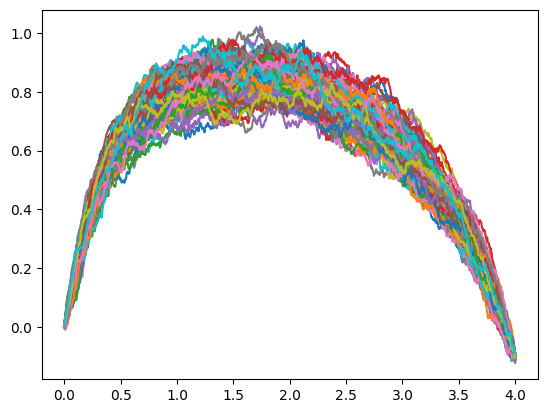

In [4]:
keys = jax.random.split(jax.random.PRNGKey(0), 100)


data_fn = sde_cell_model.data_reverse_guided(x0, y, T, N)
_, rev_trajs, correction = data_fn(keys)

for traj in rev_trajs:
    plt.plot(ts, traj[..., 0])
plt.show()

for traj in rev_trajs:
    plt.plot(ts, traj[..., 1])
plt.show()

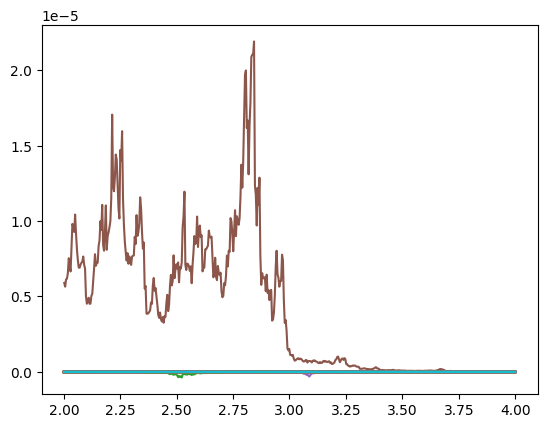

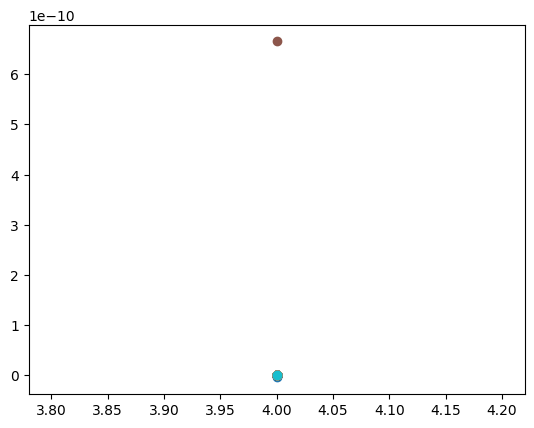

In [5]:
for c in correction:
    plt.plot(ts[500:], c[500:])
plt.show()
    
for c in correction:
    plt.scatter(ts[-1], c[-1])
plt.show()


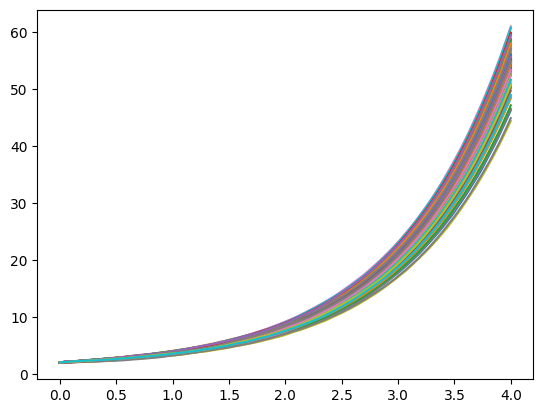

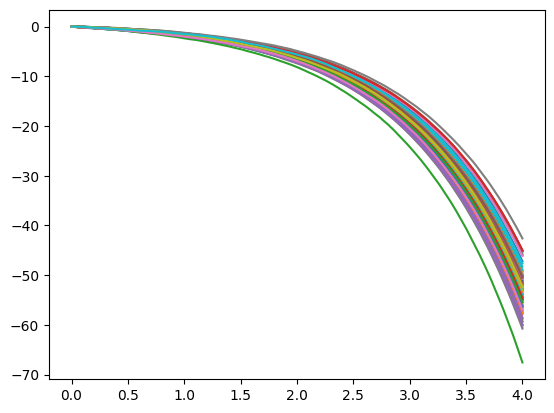

In [6]:
from src.data_generate_sde import utils
B, beta, sigma = sde_cell_model.reverse_guided_auxiliary(2)

def drift(t, x):
    return B(t) @ x + beta(t)

def diffusion(t, x):
    return sigma(t)

trajs = jax.vmap(utils.solution, in_axes=(0, None, None, None, None))(keys, ts, y, drift, diffusion)

for traj in trajs:
    plt.plot(ts, traj[..., 0])
plt.show()

for traj in trajs:
    plt.plot(ts, traj[..., 1])
plt.show()


100


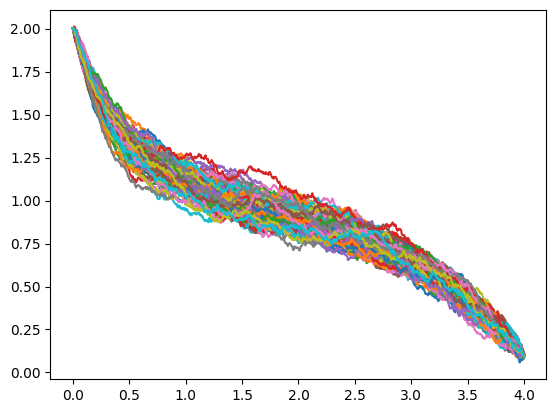

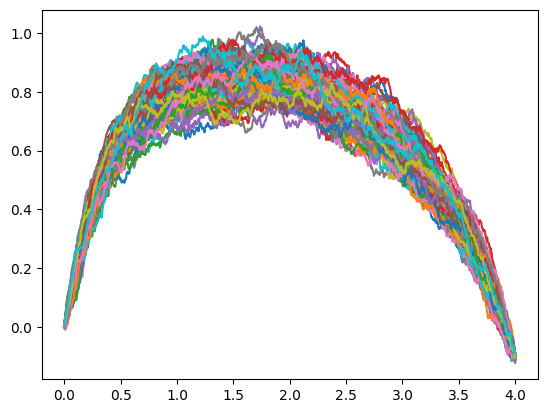

In [7]:
def good_condition(traj):
    return abs(traj[-1, 0] - 0.1)<1 and abs(traj[-1, 1] - 0.5)<1

good_trajectories = [traj for traj in rev_trajs if good_condition(traj)]
print(len(good_trajectories))

for traj in good_trajectories:
        plt.plot(ts, traj[..., 0])
plt.show()
    
for traj in good_trajectories:
    plt.plot(ts, traj[..., 1])
plt.show()